In [3]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [4]:
plt.rcParams["figure.figsize"] = (10, 10)
origin2D = np.array([0, 0])
origin3D = np.array([0, 0, 0])
scale = 10

# (행)벡터, 열벡터

In [5]:
print(np.array([1, 0]))    # (행)벡터
print(np.hstack([1, 0]))   # horizontal 로 stack 해라

print(np.vstack([1, 0]))   # 열벡터 표현

[1 0]
[1 0]
[[1]
 [0]]


In [11]:
g = np.vstack([1, 0])   # 열벡터 표현
b = np.vstack([0, 1])

# determinant 계산
# 1) g, b 를 column vector 로 갖는 matrix A 선언
A = np.hstack([g, b])
#A = np.matrix(A)
print ("A:")
print (A)

# 2) matrix A 의 determinant 계산
print("det(A):")
print(npl.det(A))

A:
[[1 0]
 [0 1]]
det(A):
1.0


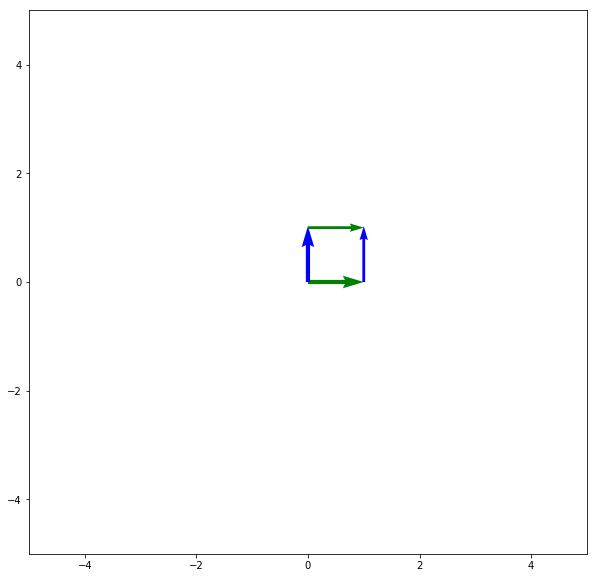

In [13]:
#화살표 그리기: 원점(x, y), 방향(u, v)
plt.axis([-scale/2, scale/2, -scale/2, scale/2])

plt.quiver(origin2D[0], origin2D[1], g[0], g[1], scale = scale, color = "g")
plt.quiver(origin2D[0], origin2D[1], b[0], b[1], scale = scale, color = "b")
plt.quiver(g[0], g[1], b[0], b[1], scale = scale, width = 0.005, color = "b")
plt.quiver(b[0], b[1], g[0], g[1], scale = scale, width = 0.005, color = "g")

plt.show()


### 2) The volume of the paralellepiped spanned by the vectors r, b, g is $|det([r, b, g])|$.

In [38]:
r = np.vstack([2, 0, -8])
g = np.vstack([6, 1, 0])
b = np.vstack([1, 4, -1])
A = np.hstack([r, g, b])
print("A:")
print(A)
print("\n")

print ("det(A):")
print (npl.det(A))

A:
[[ 2  6  1]
 [ 0  1  4]
 [-8  0 -1]]


det(A):
-185.99999999999991


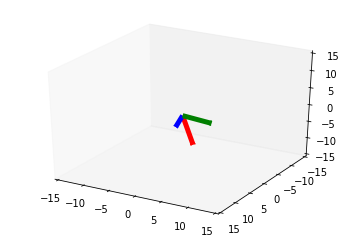

In [59]:
from mpl_toolkits import mplot3d
%matplotlib inline

#Figure setup.
fig = plt.figure()
ax = plt.axes(projection = "3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

# determinant 그리기
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 0]
         , A[1, 0], A[2, 0], color = "r", linewidths = 5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 1]
         , A[1, 1], A[2, 1], color = "g", linewidths = 5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 2]
         , A[1, 2], A[2, 2], color = "b", linewidths = 5, arrow_length_ratio = .05)



plt.show()

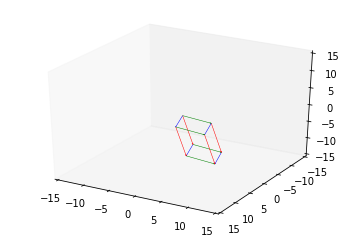

In [67]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection = "3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 0]
         , A[1, 0], A[2, 0], color = "r", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 1]
         , A[1, 1], A[2, 1], color = "g", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0, 2]
         , A[1, 2], A[2, 2], color = "b", linewidths = .5, arrow_length_ratio = .05)

import itertools as it
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label = "_nolegend_")
c = ["r", "g", "b"]
#에지 그리기 반복
for i in [i for i in list(it.product([0, 1, 2], repeat = 2)) if i[0]!=i[1]]:
    ax.quiver(A[0, i[0]], A[1, i[0]], A[2, i[0]],
             A[0, i[1]], A[1, i[1]], A[2, i[1]], color = c[i[1]], **quiverkey)

ax.quiver(A[0,1]+A[0,2], A[1,1]+A[1,2], A[2,1]+A[2,2],A[0,0], A[1,0], A[2,0], color = "r", **quiverkey)
ax.quiver(A[0,2]+A[0,0], A[1,2]+A[1,0], A[2,2]+A[2,0],A[0,1], A[1,1], A[2,1], color = "g", **quiverkey)
ax.quiver(A[0,0]+A[0,1], A[1,0]+A[1,1], A[2,0]+A[2,1],A[0,2], A[1,2], A[2,2], color = "b", **quiverkey)

plt.show()

In [72]:
#A = np.hstack([np.vstack([3, 1, 6])
#               [np.vstack([4, 3, -11])
#               [np.vstack([-8, 7, 2])
A = np.array([[3, 4, -8], [1, 3, 7], [6, -11, 2]])
print ("A:")
print (A)
print("\n")

print("Trace(A):")
print(np.trace(A))

A:
[[  3   4  -8]
 [  1   3   7]
 [  6 -11   2]]


Trace(A):
8


In [73]:
x = np.vstack([3, -1])
y = np.vstack([8, 5])

print("tr(xy^T): ")
yt = np.transpose(y)
print(np.trace(x.dot(yt)))   # x.dot(yt): cross product (x, y^T)

print("x^Ty: ")
xt = np.transpose(x)
print(xt.dot(y))

tr(xy^T): 
19
x^Ty: 
[[19]]


In [74]:
A = np.vstack([[3,2,2],[2,3,2],[2,2,3]])
print ("A:")
print(A)

print("Cholesky(A): L")
print(npl.cholesky(A))

print("L^T")
print(np.transpose(npl.cholesky(A)))

A:
[[3 2 2]
 [2 3 2]
 [2 2 3]]
Cholesky(A): L
[[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 1.18321596]]
L^T
[[1.73205081 1.15470054 1.15470054]
 [0.         1.29099445 0.51639778]
 [0.         0.         1.18321596]]


# 4.3 Eigendecomposition

### 1) eigen values & eigen vectors of A
### $Au = λu$

In [76]:
A = np.vstack([[4,2],[1,3]])
print("A:")
print(A)
print("\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)

#eigen vector u1, u2
u1 = np.vstack(e_vectors[:,0])
u2 = np.vstack(e_vectors[:,1])
print("u1: ", u1)
print("u2: ", u2)

#eigen value lambda1, lambda2
l1, l2 = e_values[0], e_values[1]
print("eigen values: ", l1, l2)
print("\n")

#Check
print("Au1: ", np.dot(A, u1))
print("l1*u1: ", l1*u1)

print("Au2: ", np.dot(A, u2))
print("l2*u2: ", l2*u2)

A:
[[4 2]
 [1 3]]


[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
('u1: ', array([[0.89442719],
       [0.4472136 ]]))
('u2: ', array([[-0.70710678],
       [ 0.70710678]]))
('eigen values: ', 5.0, 2.0)


('Au1: ', array([[4.47213595],
       [2.23606798]]))
('l1*u1: ', array([[4.47213595],
       [2.23606798]]))
('Au2: ', array([[-1.41421356],
       [ 1.41421356]]))
('l2*u2: ', array([[-1.41421356],
       [ 1.41421356]]))
